In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.optimize import root
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Classes used

##One Variable Polynomial Regression

In [2]:
class Polynomial_Regression:

  def __init__(self,x,y,grau):
    
    self.grau = grau
    self.n = len(x)
    if self.n<self.grau+1:
      raise Exception('grau do polinômio + 1 > n')
    if len(x) is not len(y):
      raise Exception('Dados não comptíveis, x maior q y')
    self.x = x
    self.y = y
    self.building_the_linear_system()
  
  def building_the_linear_system(self):

    linear_system = np.zeros((self.grau+1,self.grau+1))
    array_b = []

    for i in range(0,self.grau+1):
      for j in range(i,self.grau+1):
        sum = 0
        b = i + j
        for z in self.x:
          sum+=z**b

        linear_system[i][j] = sum
        linear_system[j][i] = sum
    
    for row in range(self.grau+1):
      sum = 0
      for i in range(self.n):
       
        sum += self.y[i]*(self.x[i])**row
      array_b.append(sum)
    
    self.system = [linear_system,array_b]
    self.coefficient = np.linalg.solve(linear_system, array_b)

  def applying_generated_function(self,value):

    sum=0

    for i in range(self.grau+1):
      sum+=self.coefficient[i]*(value**i)
    
    return sum
  
  def applying_second_polynomial_derivate(self,value):

    sum = 0

    for i in range(2,self.grau+1):
      
      sum+=self.coefficient[i]*i*(i-1)*(value**(i-2))
    
    return sum

  
  def generate_graph(self,save_graph = False,add_dots = None, title = None,xlabel = None, ylabel = None ,name_fig = 'Regression_graph.png' ,inverse=False,start_graph=0,end_graph=0):
      
    x = np.array(self.x)

    xs = np.linspace(x[0]-start_graph, x[-1]+end_graph, 1000)
    y = [self.applying_generated_function(x) for x in xs]
    plt.rcParams['figure.figsize'] = [5,7]
    plt.plot(xs,y,label = 'Curva da Regressão Polinomial')
    plt.plot(self.x,[self.y[index] for index in range(self.n)],'xr')
    if add_dots is not None:
      plt.plot(add_dots[0],add_dots[1],'og',label='ponto de inflexão')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if inverse:
      plt.gca().invert_yaxis()
    plt.title(title)
    plt.grid()
    plt.legend()
    if save_graph:
      plt.savefig(title+'.png', format='png')
    plt.show()

#Project 1

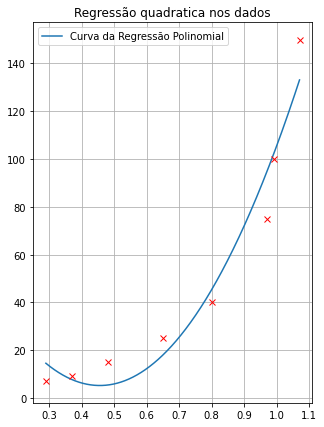

[  75.63929465 -308.97564319  338.9512113 ]


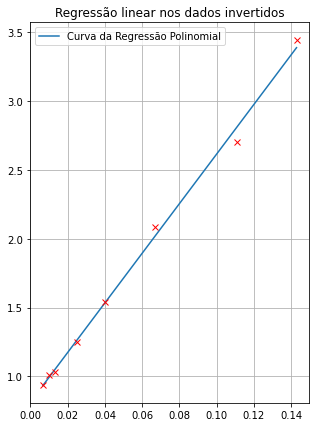

[ 0.81272315 18.03649338]


In [3]:
f = [7,9,15,25,40,75,100,150]
k = [0.29,0.37,0.48,0.65,0.8,0.97,0.99,1.07]
f_inverted = [1/number for number in f]
k_inverted = [1/number for number in k]
f_log = [math.log10(number) for number in f]
k_log = [math.log10(number) for number in k]

model = Polynomial_Regression(k,f,2)
model.building_the_linear_system()
model.generate_graph(title='Regressão quadratica nos dados',save_graph=True)
print(model.coefficient)

model_inverted = Polynomial_Regression(f_inverted,k_inverted,1)
model_inverted.building_the_linear_system()
model_inverted.generate_graph(title='Regressão linear nos dados invertidos',save_graph=True)
print(model_inverted.coefficient)


#Project 2

a profundidade da termoclina é 14.142470151953695 com temperatura respectiva de 16.0


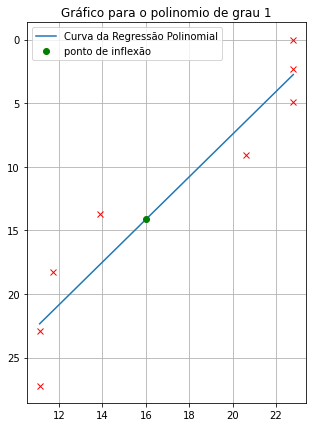

a profundidade da termoclina é 11.900385946339924 com temperatura respectiva de 16.0


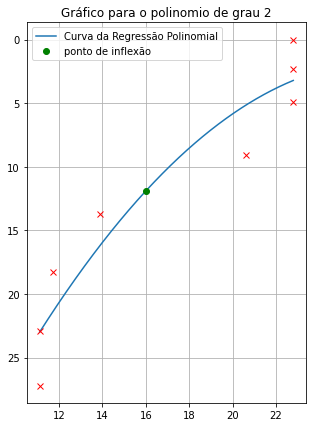

a profundidade da termoclina é 10.897266622186237 com temperatura respectiva de 17.366238793895217


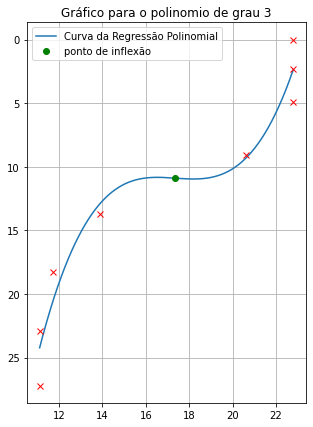

a profundidade da termoclina é 16.357097965923685 com temperatura respectiva de 14.893687829089291


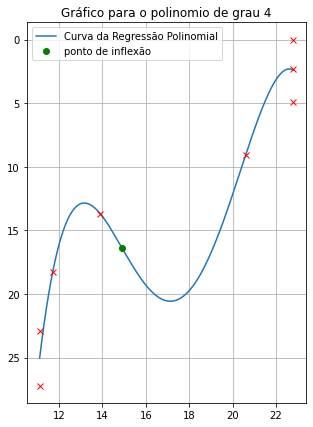

In [4]:
y = [0,2.3,4.9,9.1,13.7,18.3,22.9,27.2]
x = [22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1]

range_grau = [1,5]
results_table = []

for index in range(range_grau[0],range_grau[1]):

  model = Polynomial_Regression(x,y,index)
  estimated_y = [model.applying_generated_function(i) for i in x]
  results_table.append([index,r2_score(estimated_y,y),mean_squared_error(estimated_y,y)])
  tempeture = root(model.applying_second_polynomial_derivate,16)['x'][0]
  deph = model.applying_generated_function(tempeture) 
  print(f"a profundidade da termoclina é {deph} com temperatura respectiva de {tempeture}")
  model.generate_graph( title = "Gráfico para o polinomio de grau "+str(index),save_graph =True ,add_dots = [tempeture,deph],inverse = True)

#display(pd.DataFrame(results_table).rename(columns={0:'grau',1:'r^2',2:'MSE'}))